In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv("diamonds.csv")

In [48]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [49]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
lb=LabelEncoder()

In [52]:
df["cut_encoded"]=lb.fit_transform(df["cut"])
df["color_encoded"]=lb.fit_transform(df["color"])
df["clarity_encoded"]=lb.fit_transform(df["clarity"])



In [53]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,4,3


<Axes: >

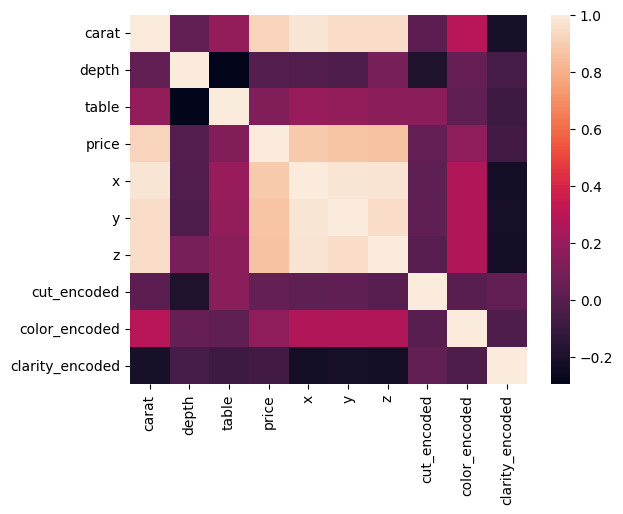

In [54]:
sns.heatmap(df.drop(["cut","color","clarity"],axis=1).corr())

In [55]:
X=df.drop(["cut","color","clarity","price","depth","table","cut_encoded","color_encoded"],axis=1)
Y=df["price"]

In [56]:
X

,carat,x,y,z,clarity_encoded
0,0.23,3.95,3.98,2.43,3
1,0.21,3.89,3.84,2.31,2
2,0.23,4.05,4.07,2.31,4
3,0.29,4.20,4.23,2.63,5
4,0.31,4.34,4.35,2.75,3
...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,2
53936,0.72,5.69,5.75,3.61,2
53937,0.70,5.66,5.68,3.56,2
53938,0.86,6.15,6.12,3.74,3


In [57]:
Y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2529)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr=LinearRegression()

In [62]:
lr.fit(X_train,Y_train)

LinearRegression()

In [63]:
import pickle
# Save the model to a file using pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)

In [64]:
lr.score(X_test,Y_test)

0.8630354877254822

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf=RandomForestRegressor()

In [67]:
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [68]:
rf.score(X_test,Y_test)

0.9335755737410015